In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
import keras
from keras import optimizers
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

Using TensorFlow backend.


读取d和m

In [2]:
x = []
y = []
for i in range(1, 3001):
    dataFile = 'd:/Matlab/Data/data{}.mat'.format(i)
    data = scio.loadmat(dataFile)
    m = data['m']/1000
    d = data['d']
    d = np.nan_to_num(d)
    mean = np.mean(d)
    std = np.std(d)
    d = (d-np.mean(d))/np.std(d)
    x.append(d)
    y.append(m.reshape(1, 16384)[0])
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(3000, 1024, 1)
(3000, 16384)


In [3]:
model = Sequential()
model.add(Flatten(input_shape=(1024, 1)))
model.add(Dense(2048))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# model.add(Dense(16384))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# model.add(Dense(32768))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

model.add(Dense(16384))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              2099200   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_1 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              8392704   
_________________________________________________________________
batch_normalization_2 (Batch (None, 4096)             

In [5]:
epochs = 50

class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
#         print ('\nSample Prediction after epoch {}\n'.format(epoch+1))
        
history = model.fit(x[:-500], y[:-500],
              epochs=epochs, 
#               batch_size=batch_size,
              validation_data=(x[-500:], y[-500:]),
              callbacks=[DisplayCallback()])

Train on 2500 samples, validate on 500 samples
Epoch 1/50
1120/2500 [============>.................] - ETA: 8s - loss: 0.2577 - accuracy: 0.0000e+00

ResourceExhaustedError:  OOM when allocating tensor with shape[4096,16384] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node Square_12 (defined at D:\Conda\envs\python37\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_keras_scratch_graph_4578]

Function call stack:
keras_scratch_graph


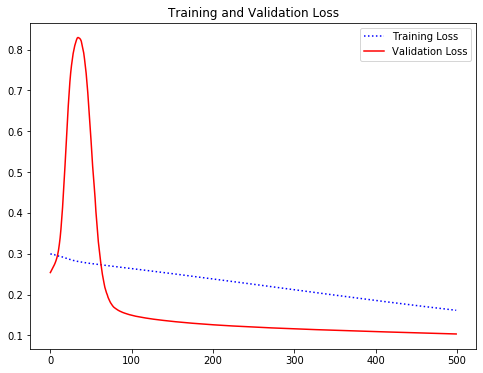

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 6))
# plt.subplot(1, 2, 1)
# # plt.ylim([0.5, 1])
# plt.plot(epochs_range, acc, label='Training Accuracy', color="b", linestyle=":")
# plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='r')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color="b", linestyle=":")
plt.plot(epochs_range, val_loss, label='Validation Loss', color='r')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
test_loss, test_acc = model.evaluate(x[-1], y[-1], verbose=2)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.0


In [9]:
predictions = model.predict(x[-1])
for i in range(16384):
    predictions[0][i]=round(predictions[0][i],0)
predictions

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

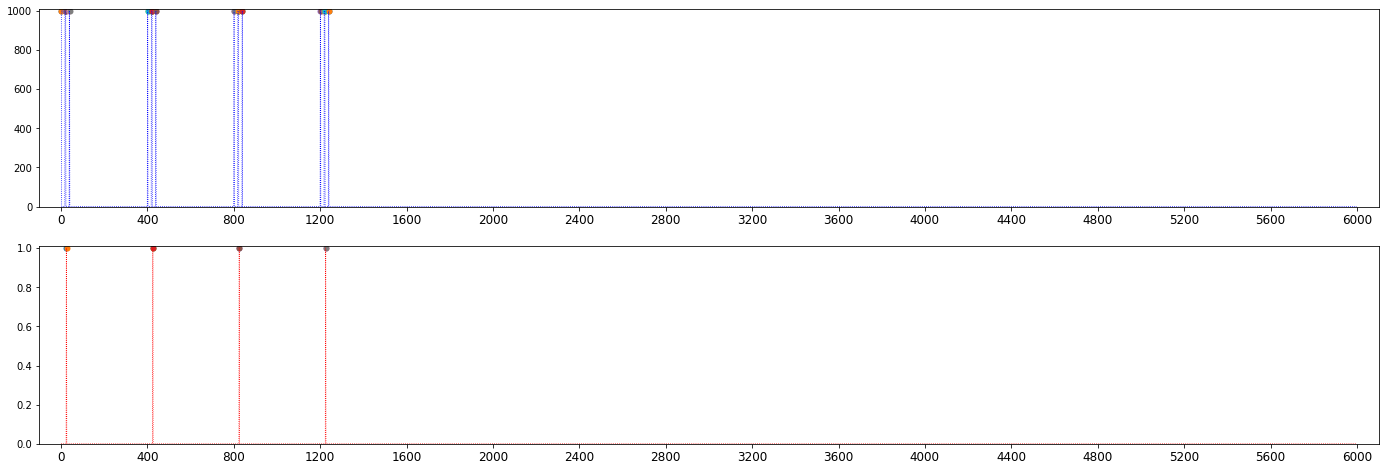

In [11]:
plt.figure(figsize=(24, 8))
plt.subplot(2,1,1)
dataFile = 'd:/Matlab/Data/data3000.mat'
data = scio.loadmat(dataFile)
m = data['m']/1000
a = range(1, 16385)
plt.xlim(-100, 16400)
plt.ylim(0, 1.1)
plt.xticks(np.arange(0, 16384, step=1024), fontsize=12)
for i in range(16384):
    if m[i]==1:
        plt.scatter(a[i], m[i],linewidths=0.001)
plt.plot(a, m, linewidth=0.8, color="b", linestyle=":")
# m[0:400]

plt.subplot(2,1,2)
plt.xlim(-100, 16400)
plt.ylim(0, 1.01)
plt.xticks(np.arange(0, 16384, step=1024), fontsize=12)
for i in range(16384):
    if predictions[0][i]==1:
        plt.scatter(a[i], predictions[0][i],linewidths=0.001)
plt.plot(a, predictions[0], linewidth=0.8, color="r", linestyle=":")